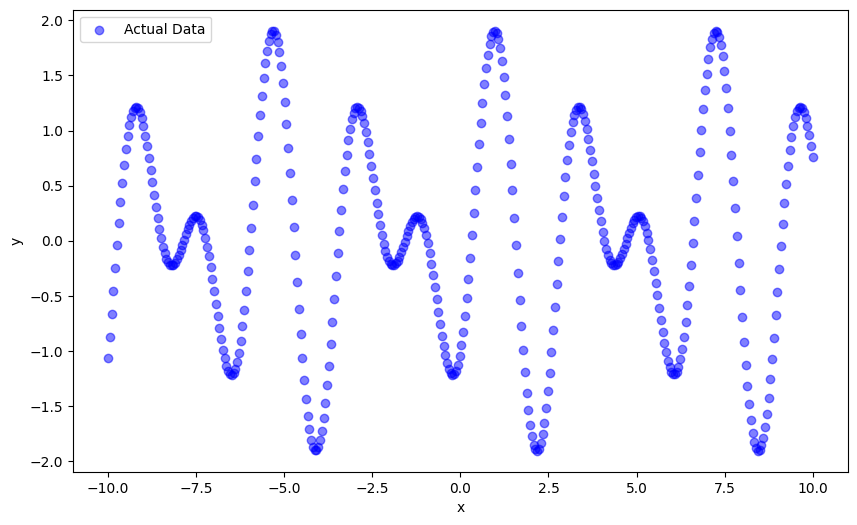

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.linspace(-10, 10, 400).reshape(-1, 1)
y = np.sin(2 * x) - np.cos(3 * x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Actual Data", color="blue", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Backpropagation

### Loss Function

The loss function helps us understand the quality of the model’s predictions. The loss refers to the error of a single observation, while the cost refers to the average error of the entire dataset. For regression tasks, we can use **Mean Squared Error** which is:

$$
J(A3, y) = \frac{1}{m} \sum_{i=1}^m (A3_{i} - y_i)^2
$$

Where:

- $J$ is the **cost function**

We can get rid of the summation by treating $A3$ and $y$ as matrices:

$$
J(A3, y) = \frac{1}{m}(A3 - y)^2
$$

The process of backpropagation involves taking the derivatives from the loss function with respect to the weights and biases.

We can follow a similar process to above. However in this case, $A3 = Z3$ since we are using a linear activation, so the chained expression becomes:

$$
\frac{\partial J}{\partial W3} = \frac{\partial J}{\partial Z3} \cdot \frac{\partial Z3}{\partial W3}
$$

### Derivative of the Loss Function

The derivative of the Mean Squared Error loss function with respect to $A_3$ can be easily calculated using the power rule, which is:

$$
\frac{2}{m}(A3-y)
$$

### Finding Partial Derivatives

Now that we know the derivative of the loss function in terms of $A3$ (which is equal to $Z_3$), we have to find the derivative of $Z3$ with respect to $W3$.

Since $Z3_i = W3 \cdot A2_i + b3$, this can be viewed as a linear line, so the derivative must be the slope of the line: $A2$

Thus, putting each of the partial derivatives together, we get that the derivative of the MSE Loss function with respect to $W3$ is:

$$
\frac{\partial J}{\partial W3}=\frac{2}{m}(A3 - y)\cdot A2
$$

We can get rid of the last part of the chained expression, $A2$ to get:

$$
\partial Z3 = \frac{2}{m}(A3-y)
$$

The partial derivative of a sum is the derivative of a function with respect to one of its variables while treating other variables as constants, disregarding them in differentiation. The term $b3$ would be constant, while the derivative of $Z3$ with respect to $W3$ would be the partial derivate that we are looking for.

We can further use the chain rule to find the derivative of the loss with respect to $W2$:

$$
\frac{\partial J}{\partial W2} = \frac{\partial J}{\partial Z3}  \cdot \frac{\partial Z3}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} \cdot \frac{\partial Z2}{\partial W2}
$$

The derivative of $\frac{\partial Z3}{\partial A2}$ is calculated similarly to above:

$$
Z3=W3 \cdot A2 + b3
$$

So the derivative term is equal to $W3$

We also have to find the derivative of the Activation Function used in the second layer, $\frac{\partial A2}{\partial Z2}$, which we can just represent as $g\prime(Z2)$ for now. Depending on the activation function being used, the derivative is different.

Also, the derivative of $\frac{\partial Z2}{\partial W2}$ is $A1$, since:

$$
Z2=W2 \cdot A1 + b2
$$

Putting each of these partial derivatives through the chained equation above, we get that $\partial W2 = \partial Z3 \cdot W3 \cdot g\prime(Z2) \cdot A1$

Plugging in the known value of $\partial Z3$, we get that $\partial W2$ is:

$$
\partial W2 = \frac{2}{m}(A3-y) \cdot W3 \cdot g\prime(Z2) \cdot A1
$$

Removing the last term of the chained expression, $A1$, we get that:

$$
\partial Z2 = \partial Z3 \cdot W3 \cdot g\prime(Z2)
$$

Plugging in the known value of $\partial Z3$, we get:

$$
\partial Z2 = \frac{2}{m}(A3-y) \cdot W3 \cdot g\prime(Z2)
$$

Following the same steps to calculate the derivative of $W1$, we get the chained expression:

$$
\frac{\partial J}{\partial W2} =  \frac{\partial J}{\partial Z3}  \cdot \frac{\partial Z3}{\partial A2} \cdot \frac{\partial A2}{\partial Z2}  \cdot \frac{\partial Z2}{\partial A1} \cdot \frac{\partial A1}{\partial Z1} \cdot \frac{\partial Z1}{\partial W1}
$$

Using the previously calculated expressions, we get that the derivative of $\frac{\partial Z1}{\partial W1}$ is $X$ (our input), which makes sense. We get this since, $Z1 = (W1 \cdot X) + b1$

Putting these through the chained equation, we get that $\partial W1 = \partial Z2 \cdot W2 \cdot g\prime(Z1) \cdot X$

Plugging in the known value of $\partial Z2$, we get:

$$
\partial W1 = (\frac{2}{m}(A3-y) \cdot W3 \cdot g\prime(Z2)) \cdot W2 \cdot g\prime(Z1) \cdot X
$$

Removing the last term of the chained expression, $X$, we get that:

$$
\partial Z1 = \partial Z2 \cdot W2 \cdot g\prime(Z1)
$$

Plugging in the known value of $\partial Z2$, we get:

$$
\partial Z1 = (\frac{2}{m}(A3-y) \cdot W3 \cdot g\prime(Z2)) \cdot W2 \cdot g\prime(Z1)
$$

Looking back at this, we use the chain rule of partial derivatives because we are trying to find the derivative of $W3$ with respect to the loss function, but the loss function does not actually contain $W3$. So we use the chain rule to use the equation for $Z3$.

We need to save the variables for $\partial Z1$, $\partial Z2$, and  $\partial Z3$ because we need these to calculate the bias term. We can just sum up all of the terms in each of these partial derivatives as they have already been divided by the size of the data samples to get the bias term for each.

## Gradient Descent

Now that we have the partial derivatives of the weights and biases for each layer, we actually have to use these. This is where the process of gradient descent comes into play. Gradient Descent is an iterative process in which we take the calculated gradients for the weights and biases, and subtract them from the respective weight or bias with a learning rate, $\alpha$.

$$
W_i=W_{i-1}-(\alpha \cdot \frac{\partial J}{\partial  W_i})
$$

$$
b_i=b_{i-1}-(\alpha \cdot \sum_{j=1}^m \partial ZI_j)
$$

This allows us to find the metaphorical “valley” or dips in the cost function in which the loss has been minimized, which is the goal of our training model.

In [ ]:
class CurveFittingFromScratch:
  def __init__(self):
    self.lr = 0.1
    self.epochs = 10000

    self.weights1 = np.random.randn(1, 256) * 0.05
    self.bias1 = np.zeros((1, 256))
    self.weights2 = np.random.randn(256, 256) * 0.05
    self.bias2 = np.zeros((1, 256))
    self.weights3 = np.random.randn(256, 256) * 0.05
    self.bias3 = np.zeros((1, 256))
    self.weights4 = np.random.randn(256, 1) * 0.05
    self.bias4 = np.zeros((1, 1))

  def ReLU(self, x):
    return np.maximum(0, x)

  def ReLU_derivative(self, x):
    return (x > 0).astype(float) # Either 0 or 1

  def forward(self, x):
    # Forward pass
    self.z1 = x @ self.weights1 + self.bias1
    self.a1 = self.ReLU(self.z1)
    self.z2 = self.a1 @ self.weights2 + self.bias2
    self.a2 = self.ReLU(self.z2)
    self.z3 = self.a2 @ self.weights3 + self.bias3
    self.a3 = self.ReLU(self.z3)
    self.z4 = self.a3 @ self.weights4 + self.bias4
    return self.z4

  def train(self, x, y):
    for epoch in range(self.epochs):
      y_pred = self.forward(x)
      loss = np.mean((y_pred - y)**2) # MSE Loss

      # Backpropagation
      dz4 = 2 * (y_pred - y) / y.size # Derivative of MSE loss
      dw4 = self.a3.T @ dz4 # Gradient of the loss of the weights of the output layer
      db4 = np.sum(dz4, axis=0, keepdims=True) # Gradient of the loss of the bias of the output layer, calculated as an average of the error

      da3 = dz4 @ self.weights4.T # Derivative of the loss of the activations of the third hidden layer
      dz3 = da3 * self.ReLU_derivative(self.z3) # The derivative of the loss of the input of the third hidden layer
      dw3 = self.a2.T @ dz3 # Gradient of the loss of the weights of the third hidden layer
      db3 = np.sum(dz3, axis=0, keepdims=True) # Gradient of the loss of the bias of the third hidden layer, calculated as an average of the error

      da2 = dz3 @ self.weights3.T # Derivative of the loss of the activations of the second hidden layer
      dz2 = da2 * self.ReLU_derivative(self.z2) # The derivative of the loss of the input of the second hidden layer
      dw2 = self.a1.T @ dz2 # Gradient of the loss of the weights of the second hidden layer
      db2 = np.sum(dz2, axis=0, keepdims=True) # Gradient of the loss of the bias of the second hidden layer, calculated as an average of the error

      da1 = dz2 @ self.weights2.T # Derivative of the loss of the activations of the first hidden layer
      dz1 = da1 * self.ReLU_derivative(self.z1) # The derivative of the loss of the input of the first hidden layer
      dw1 = x.T @ dz1 # Gradient of the loss of the weights of the second hidden layer
      db1 = np.sum(dz1, axis=0, keepdims=True) # Gradient of the loss of the bias of the second hidden layer, calculated as an average of the error

      # Update each of the weights and biases with the respective gradient
      self.weights1 -= self.lr * dw1
      self.bias1 -= self.lr * db1
      self.weights2 -= self.lr * dw2
      self.bias2 -= self.lr * db2
      self.weights3 -= self.lr * dw3
      self.bias3 -= self.lr * db3
      self.weights4 -= self.lr * dw4
      self.bias4 -= self.lr * db4

      if epoch % (self.epochs / 10) == 0:
          print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.9898789281461297
Epoch 1000, Loss: 0.7646764866812064
Epoch 2000, Loss: 0.5916106676276518
Epoch 3000, Loss: 0.4919864571021836
Epoch 4000, Loss: 0.43588700175213335
Epoch 5000, Loss: 0.5482779772486586
Epoch 6000, Loss: 0.40447803476051236
Epoch 7000, Loss: 0.39639036047130716
Epoch 8000, Loss: 0.3759764305354773
Epoch 9000, Loss: 0.36248890431413855


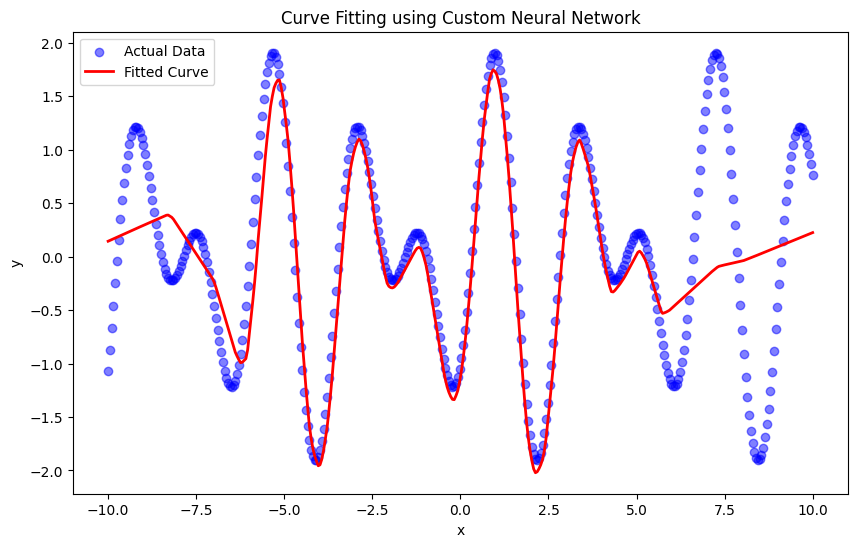

In [ ]:
# Initialize and train the model
model = CurveFittingFromScratch()
model.train(x, y)

# Predict and plot
y_pred = model.forward(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Actual Data", color="blue", alpha=0.5)
plt.plot(x, y_pred, label="Fitted Curve", color="red", linewidth=2)
plt.title("Curve Fitting using Custom Neural Network")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()